# Image Classification Basic (3) 

In [1]:
import os
from glob import glob

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

- glob 방식

In [2]:
data_paths = glob('dataset/mnist_png/training/0/*.png')
data_paths[0]

'dataset/mnist_png/training/0\\1.png'

In [3]:
path = data_paths[0]
path

'dataset/mnist_png/training/0\\1.png'

- tf 방식

In [6]:
data_paths = tf.io.matching_files('dataset/mnist_png/training/*/*.png')
data_paths[0]

<tf.Tensor: id=12, shape=(), dtype=string, numpy=b'dataset\\mnist_png\\training\\0\\1.png'>

In [7]:
path = data_paths[0]
path

<tf.Tensor: id=17, shape=(), dtype=string, numpy=b'dataset\\mnist_png\\training\\0\\1.png'>

### Load Image

In [8]:
gfile = tf.io.read_file(path)               # path받아서 file로 읽고
image = tf.io.decode_image(gfile)  # file을 image numpy로 변환

In [9]:
image.shape

TensorShape([28, 28, 1])

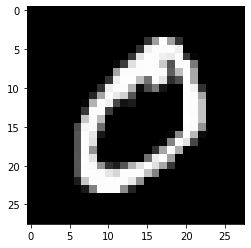

In [10]:
plt.imshow(image[:,:,0], 'gray')
plt.show()

## Set Data Generator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [15]:
image.shape

TensorShape([28, 28, 1])

In [14]:
inputs = image[tf.newaxis, ...] # 차원 하나 늘려줘야!
inputs.shape

TensorShape([1, 28, 28, 1])

In [16]:
image = next(iter(datagen.flow(inputs)))
image.shape

(1, 28, 28, 1)

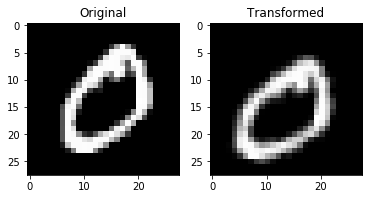

In [18]:
plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed')
plt.imshow(np.squeeze(image),'gray')
plt.show()

## Transformation
- width_shift_range
- height_shift_range
- brightness_range
- zoom_range
- horizontal_flip
- vertical_flip
- rescale
- preprocessing_function

#### width_shift_range

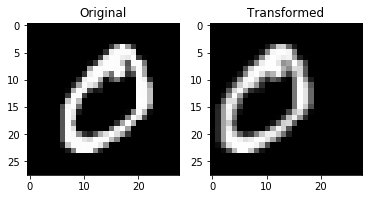

In [24]:
datagen = ImageDataGenerator(
    width_shift_range=0.4
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed')
plt.imshow(np.squeeze(outputs),'gray')
plt.show()

#### zoom_range

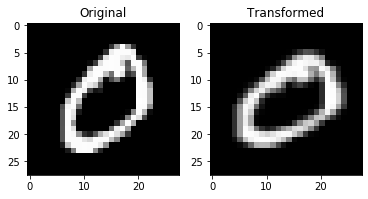

In [25]:
datagen = ImageDataGenerator(
    zoom_range=0.3
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed')
plt.imshow(np.squeeze(outputs),'gray')
plt.show()

## Rescaling 시 주의사항

- augmentation : train
- rescale : train & test

In [26]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

train_datagen = ImageDataGenerator(
    #zoom_range=0.7,
    rescale=1./255.
)